In [1]:
import TestFunctions as tf
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from importlib import reload
import random as r
import time
import matplotlib.animation as animation
import math

In [2]:
class Solution:
    def __init__(self, dimension, lower_bound, upper_bound):
        self.d = dimension
        self.lower = lower_bound # we will use the same bounds for all parameters
        self.upper = upper_bound
        self.params = np.zeros(self.d) #solution parameters
        self.f = np.inf # objective function evaluation

In [3]:
def SimulatedAnnealing(solution, func):
    T0 = 100
    TMin = 0.5
    alpha = 0.95
    T = T0
    for i in range(0,len(solution.params)):
        solution.params[i] = r.uniform(solution.lower, solution.upper) # Generate random coordinates for the first time
    z = func(tuple(i for i in solution.params)) # Get value of function in generated point on graph
    minZ = z
    bestParams = solution.params.copy()
    standardDeviation = 1 # For normal distribution of data, values within standard deviation of 2 account for about 95% of values 
    snaps = []
    snaps.append((solution.params.copy()[0], solution.params.copy()[1], z)) # Save first point
    while T > TMin:# Stop generation of new points when min temperature is reached
        for i in range(0,len(solution.params)):
            solution.params[i] = np.random.normal(bestParams[i], standardDeviation)# generate neighbor based on current solution
        z = func(tuple(i for i in solution.params))
        if minZ > z:
            minZ = z
            bestParams = solution.params.copy()
            snaps.append((solution.params.copy()[0], solution.params.copy()[1], z))
        else:
            rc = np.random.uniform(0,1)
            if rc < pow(math.e, -(z - minZ)/T):#Generate random value from 0 till 1 and compare it with pow(math.e, -(z - minZ)/T), if its smaller then swap x = x_i 
                minZ = z
                bestParams = solution.params.copy()
                snaps.append((solution.params.copy()[0], solution.params.copy()[1], z))
        T = T * alpha
    print(bestParams)
    solution.params = bestParams
    return (solution,snaps)# Return tuple with solution at index [0] and list of coordinates (x,y,z) for points at index [1]

In [4]:
def plot3DWithAnimation(xRangeMin, xRangeMax, yRangeMin, yRangeMax, func, params, gifName):
    x = np.linspace(xRangeMin, xRangeMax, 30)
    y = np.linspace(yRangeMin, yRangeMax, 30)
    #x = np.concatenate((x[x<0], [0], x[x>0]))#insert [0,0], doesnt work neither
    #y = np.concatenate((y[y<0], [0], y[y>0]))
    X, Y = np.meshgrid(x, y)
    Z = func((X, Y))
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='magma', edgecolor='none', zorder=1, alpha=0.4)
    ax.set_title(func.__name__)
    ax.set_zlim(0, Z.max())
    scatter = ax.scatter([], [], [], color='red', s=100, zorder=4)  # Placeholder for the scatter plot
    # Function thats gonna be called by FuncAnimation at every interval
    def animate(i):
        x = [params[i][0]]  
        y = [params[i][1]]  
        z = [params[i][2]]
        scatter._offsets3d = (x, y, z)  # Update the scatter plot data
        #plt.pause(0.2) # Pause plotting for smoother animation
    ani = animation.FuncAnimation(fig, animate, repeat=True, frames=len(params), interval=1000) # Generate animation
    
    writer = animation.PillowWriter(fps=1, metadata=dict(artist='Me'), bitrate=1800)
    ani.save(gifName, writer=writer) # Save animation -> plt.show() of Gif seems to display just one frame in Jupyter notebook, viewing gif file seperately shows entire animation
    
    plt.show()

[-0.77571359  1.33030362]


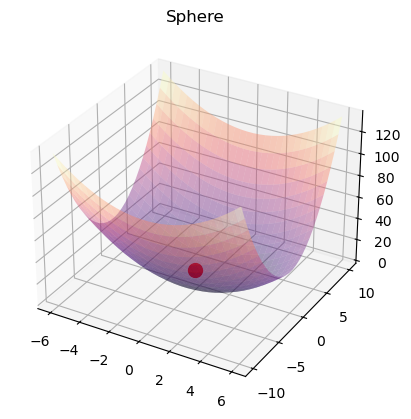

In [20]:
funcs = tf.getAllFunctions()
x = Solution(2,funcs[0][1],funcs[0][0])
func = funcs[0][4]
result = SimulatedAnnealing(x,func)
x = result[0]
func = funcs[0]
params = result[1]
plot3DWithAnimation(func[0],func[1],func[2],func[3],func[4],params,'SphereAnnealing.gif')

In [21]:
params

[(1.9676084810221743, 3.1088282819298314, 13.536296421117175),
 (0.3035558113566492, 4.077793969425595, 16.720549787692143),
 (0.4468716656433086, 5.352674325909848, 28.850816724809267),
 (-0.06768450565852224, 4.39400504056217, 19.311861488791994),
 (1.062548085532336, 4.529794713450098, 21.648048580068888),
 (2.2536263151176437, 4.599224953486134, 26.23170174096026),
 (2.295488933395842, 5.392012013503114, 34.34306299710469),
 (1.4733471271569418, 5.91874719052599, 37.20232006246091),
 (1.5697226025628426, 5.311345548540816, 30.674420585001002),
 (2.9662093014716056, 5.656726028637516, 40.796946983201835),
 (4.478829279096432, 6.7729221155547945, 65.9323856946627),
 (4.957131670164781, 6.438875704362169, 66.03227473157608),
 (4.207390098674137, 6.087898973402607, 54.764645352777684),
 (4.0834539833999415, 7.244216608786675, 69.15327070956556),
 (4.909818894193158, 5.946472161920795, 59.4668527462751),
 (4.5041879011713535, 5.963646605681855, 55.85278948651911),
 (4.972919439622841, 4

[30.11386488 -1.99313835]


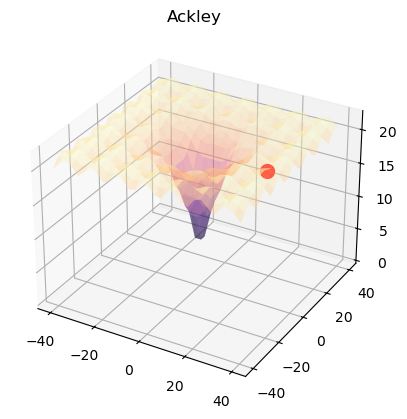

In [22]:
funcs = tf.getAllFunctions()
x = Solution(2,funcs[1][1],funcs[1][0])
func = funcs[1][4]
result = SimulatedAnnealing(x,func)
x = result[0]
func = funcs[1]
params = result[1]
plot3DWithAnimation(func[0],func[1],func[2],func[3],func[4],params,'AckleyAnnealing.gif')

In [23]:
params

[(27.49602559250833, -0.38051339895466896, 21.888053589173268),
 (26.772263655962746, -1.2891736698481284, 21.317400154574887),
 (26.245295935122567, -1.4843055579904598, 21.615369974779252),
 (26.3440214324165, -0.4438700648820133, 21.763122510476663),
 (25.188622557405928, -1.0547006377174961, 20.219985801631577),
 (25.40008084373161, 0.09635148012076833, 21.160992783092503),
 (25.10671277158078, -0.13841805294209342, 20.101459172434595),
 (25.557073664940727, -2.0989528429356286, 21.24598256436361),
 (25.01313706379211, -1.1628925100985663, 20.003658531516248),
 (25.178317927303315, -1.447535940535082, 21.378673751317102),
 (24.766924675989937, -1.5558761979999647, 21.460634203673965),
 (22.983484006462742, -1.5921991753414528, 20.8670052319947),
 (23.20572370979513, -2.434311949529229, 21.254827135503312),
 (23.19504442173225, -1.8074495142867533, 20.56021009413718),
 (22.905839791507493, -2.0031640893144385, 19.44757252474866),
 (23.063264070339947, -3.0201753671328913, 19.3689379

[-0.03576471  0.16193347]


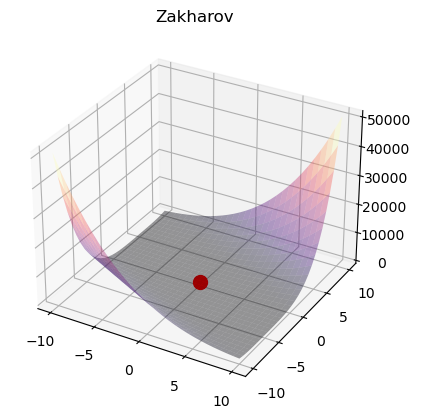

In [5]:
funcs = tf.getAllFunctions()
x = Solution(2,funcs[-1][1],funcs[-1][0])
func = funcs[-1][4]
result = SimulatedAnnealing(x,func)
x = result[0]
func = funcs[-1]
params = result[1]
plot3DWithAnimation(func[0],func[1],func[2],func[3],func[4],params,'ZakcharovAnnealing.gif')